<a href="https://colab.research.google.com/github/santhoshreddy39/Ineuron-ML-and-DL/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data analysis and wrangling
import numpy as np     # Linear algebra
import pandas as pd    # File read & write operation

# Visualization
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Machine Learning 
import sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import pickle

In [ ]:
# Loading the data from scikit learn library
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['MEDV']=boston.target
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### What are the features ?

 The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
data=bos
print(data.shape)
data.info()     # Summary of data frame

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
data.isnull().sum() # Finding the count of missing values from each column

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# Summarizing the data to see distribution
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
X=data.drop(['MEDV'],axis=1)  # Removing the dependent variable from the dataset
y=data['MEDV']                # Making dependent variable (price) in y

Now, Let's see the relationship among the features and target column (Price)

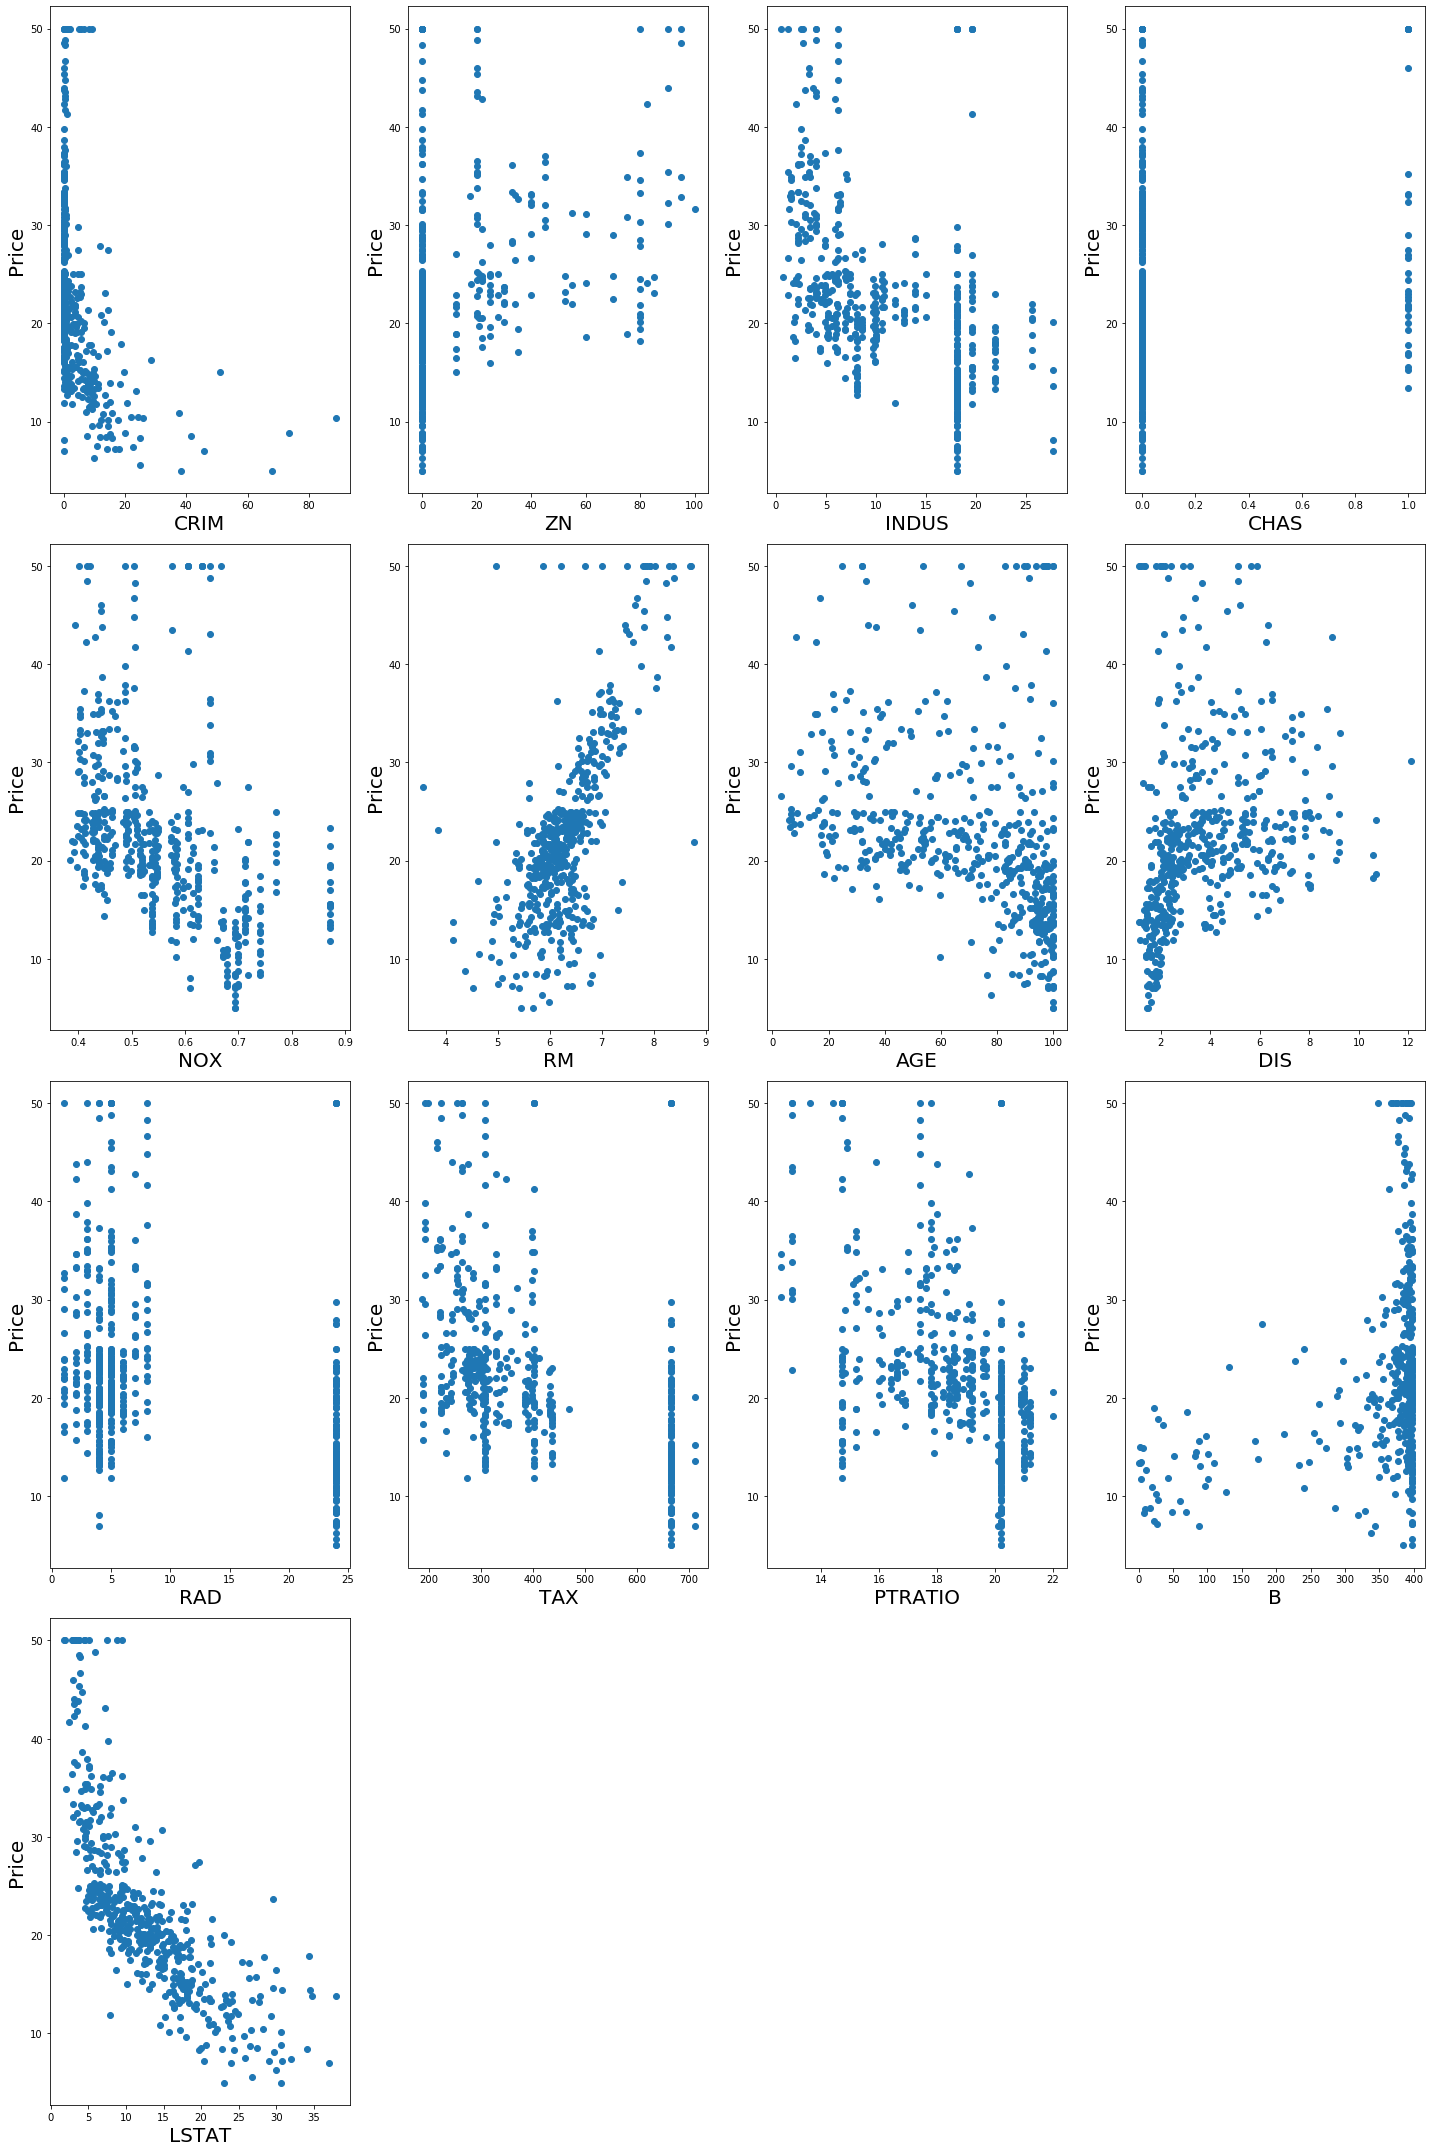

In [ ]:
#Visulazing the relationship between the features and target variable using scatter plot
plt.figure(figsize=(20,30))
plotnumber=1
for column in X:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

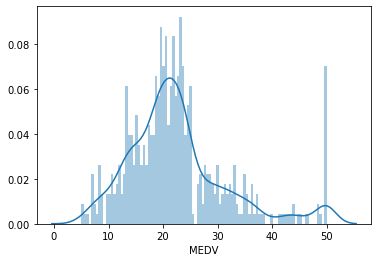

In [ ]:
# Distribution of target variable: MEDV
sns.distplot(bos['MEDV'],bins=100)
plt.show()

## Multi-Collinearity

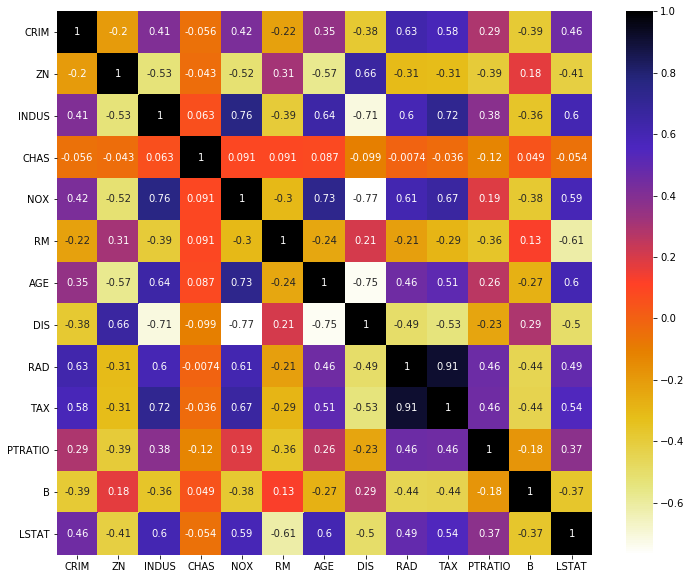

In [ ]:
# Pearson Correlation
plt.figure(figsize=(12,10))
cor=X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(X,threshold):
    col_corr=set()
    corr_matrix=X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr  

In [ ]:
corr_features=correlation(X, 0.9)
print(len(set(corr_features)))
print(corr_features)

1
{'TAX'}


By seeing the above pearson correlation, we understood that there is a high correlation between TAX & RAD which means these two features are dependent on each other. So, we need to drop one feature. In this case I'm dropping the TAX column from both train & test data sets.

In [ ]:
X.drop(['TAX'],axis=1,inplace=True)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


## Random Forest

In [ ]:
# Splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=355)

In [ ]:
scaling=MinMaxScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.fit_transform(X_test)

In [ ]:
y_train=scaling.fit_transform(y_train[:,None])[:,0]
y_test=scaling.fit_transform(y_test[:,None])[:,0]

In [ ]:
rand_reg=RandomForestRegressor()
rand_reg.fit(X_train,y_train)
rand_reg.score(X_test,y_test)

0.8549306643448356

In [ ]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : range(10,200,20),
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','sqrt','log2']
}

In [ ]:
grid_search = GridSearchCV(estimator=rand_reg,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 34560 candidates, totalling 172800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 10}

In [ ]:
rand_reg_best = RandomForestRegressor(criterion= 'mse',
 max_depth = 6,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 3,
 n_estimators = 10,random_state=6)

In [ ]:
rand_reg_best.fit(X_train,y_train)
rand_reg_best.score(X_test,y_test)

0.8569668180260951

In [ ]:
y_pred=rand_reg_best.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print(f'R^2 : {r2_score(y_test,y_pred)}')
print(f'MSE : {mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 : 0.8569668180260951
MSE : 0.006314239592649317
RMSE: 0.07946218970459672


With the hyper parameter tuning we improved our model accuracy from 84.6% to 85.69 %.

In [ ]:
# Save the model
import pickle
# Writing different model files to file
with open( 'modelForPrediction_RandomForest.sav', 'wb') as f:
    pickle.dump(rand_reg_best,f)